In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import tree

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [3]:
from IPython.display import HTML
style = "<style>svg{width:0.1% !important;height:0.1% !important:}<style>"
HTML(style)

In [4]:
titanic_data = pd.read_csv('train.csv')

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
X = titanic_data.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis =1)
y = titanic_data['Survived']

In [10]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [11]:
X = pd.get_dummies(X)

In [12]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [13]:
X['Age'].median()

28.0

In [14]:
X = X.fillna({'Age':X.Age.median()})

In [15]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [16]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

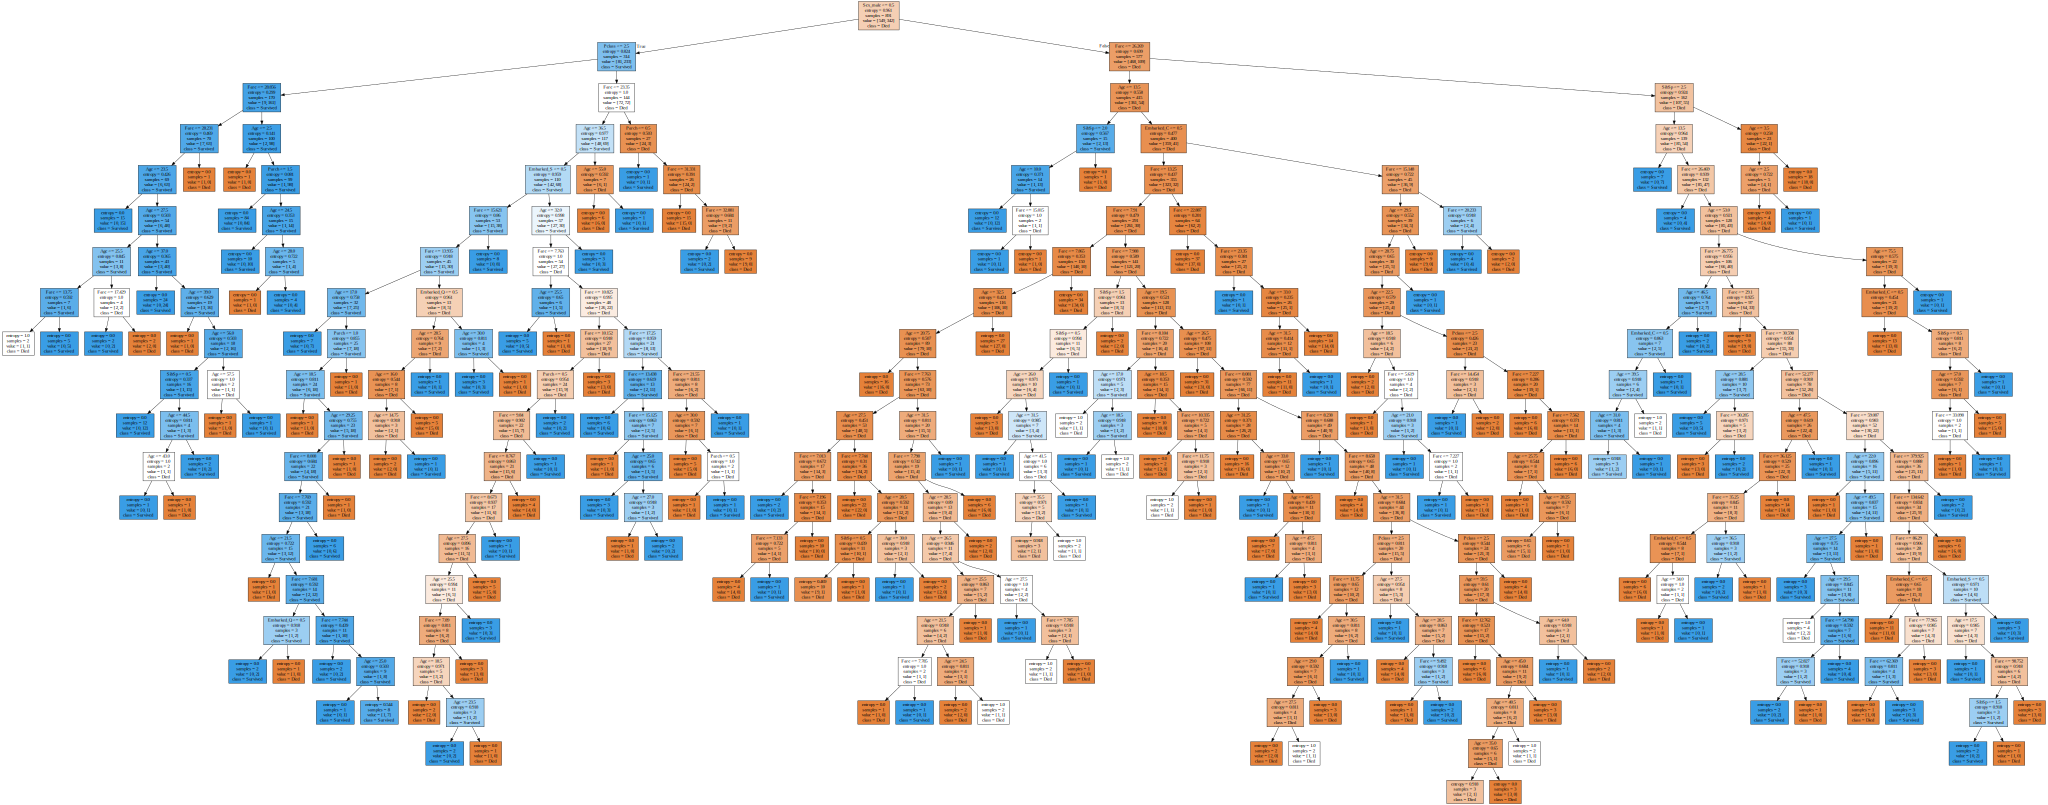

<Figure size 1800x360 with 0 Axes>

In [17]:
plt.figure(figsize=(25, 5))
graph = Source(tree.export_graphviz(clf, out_file=None,
                                  feature_names=list(X),
                                  class_names=['Died', 'Survived'],
                                  filled=True))
display(SVG(graph.pipe(format='svg')))
plt.show()

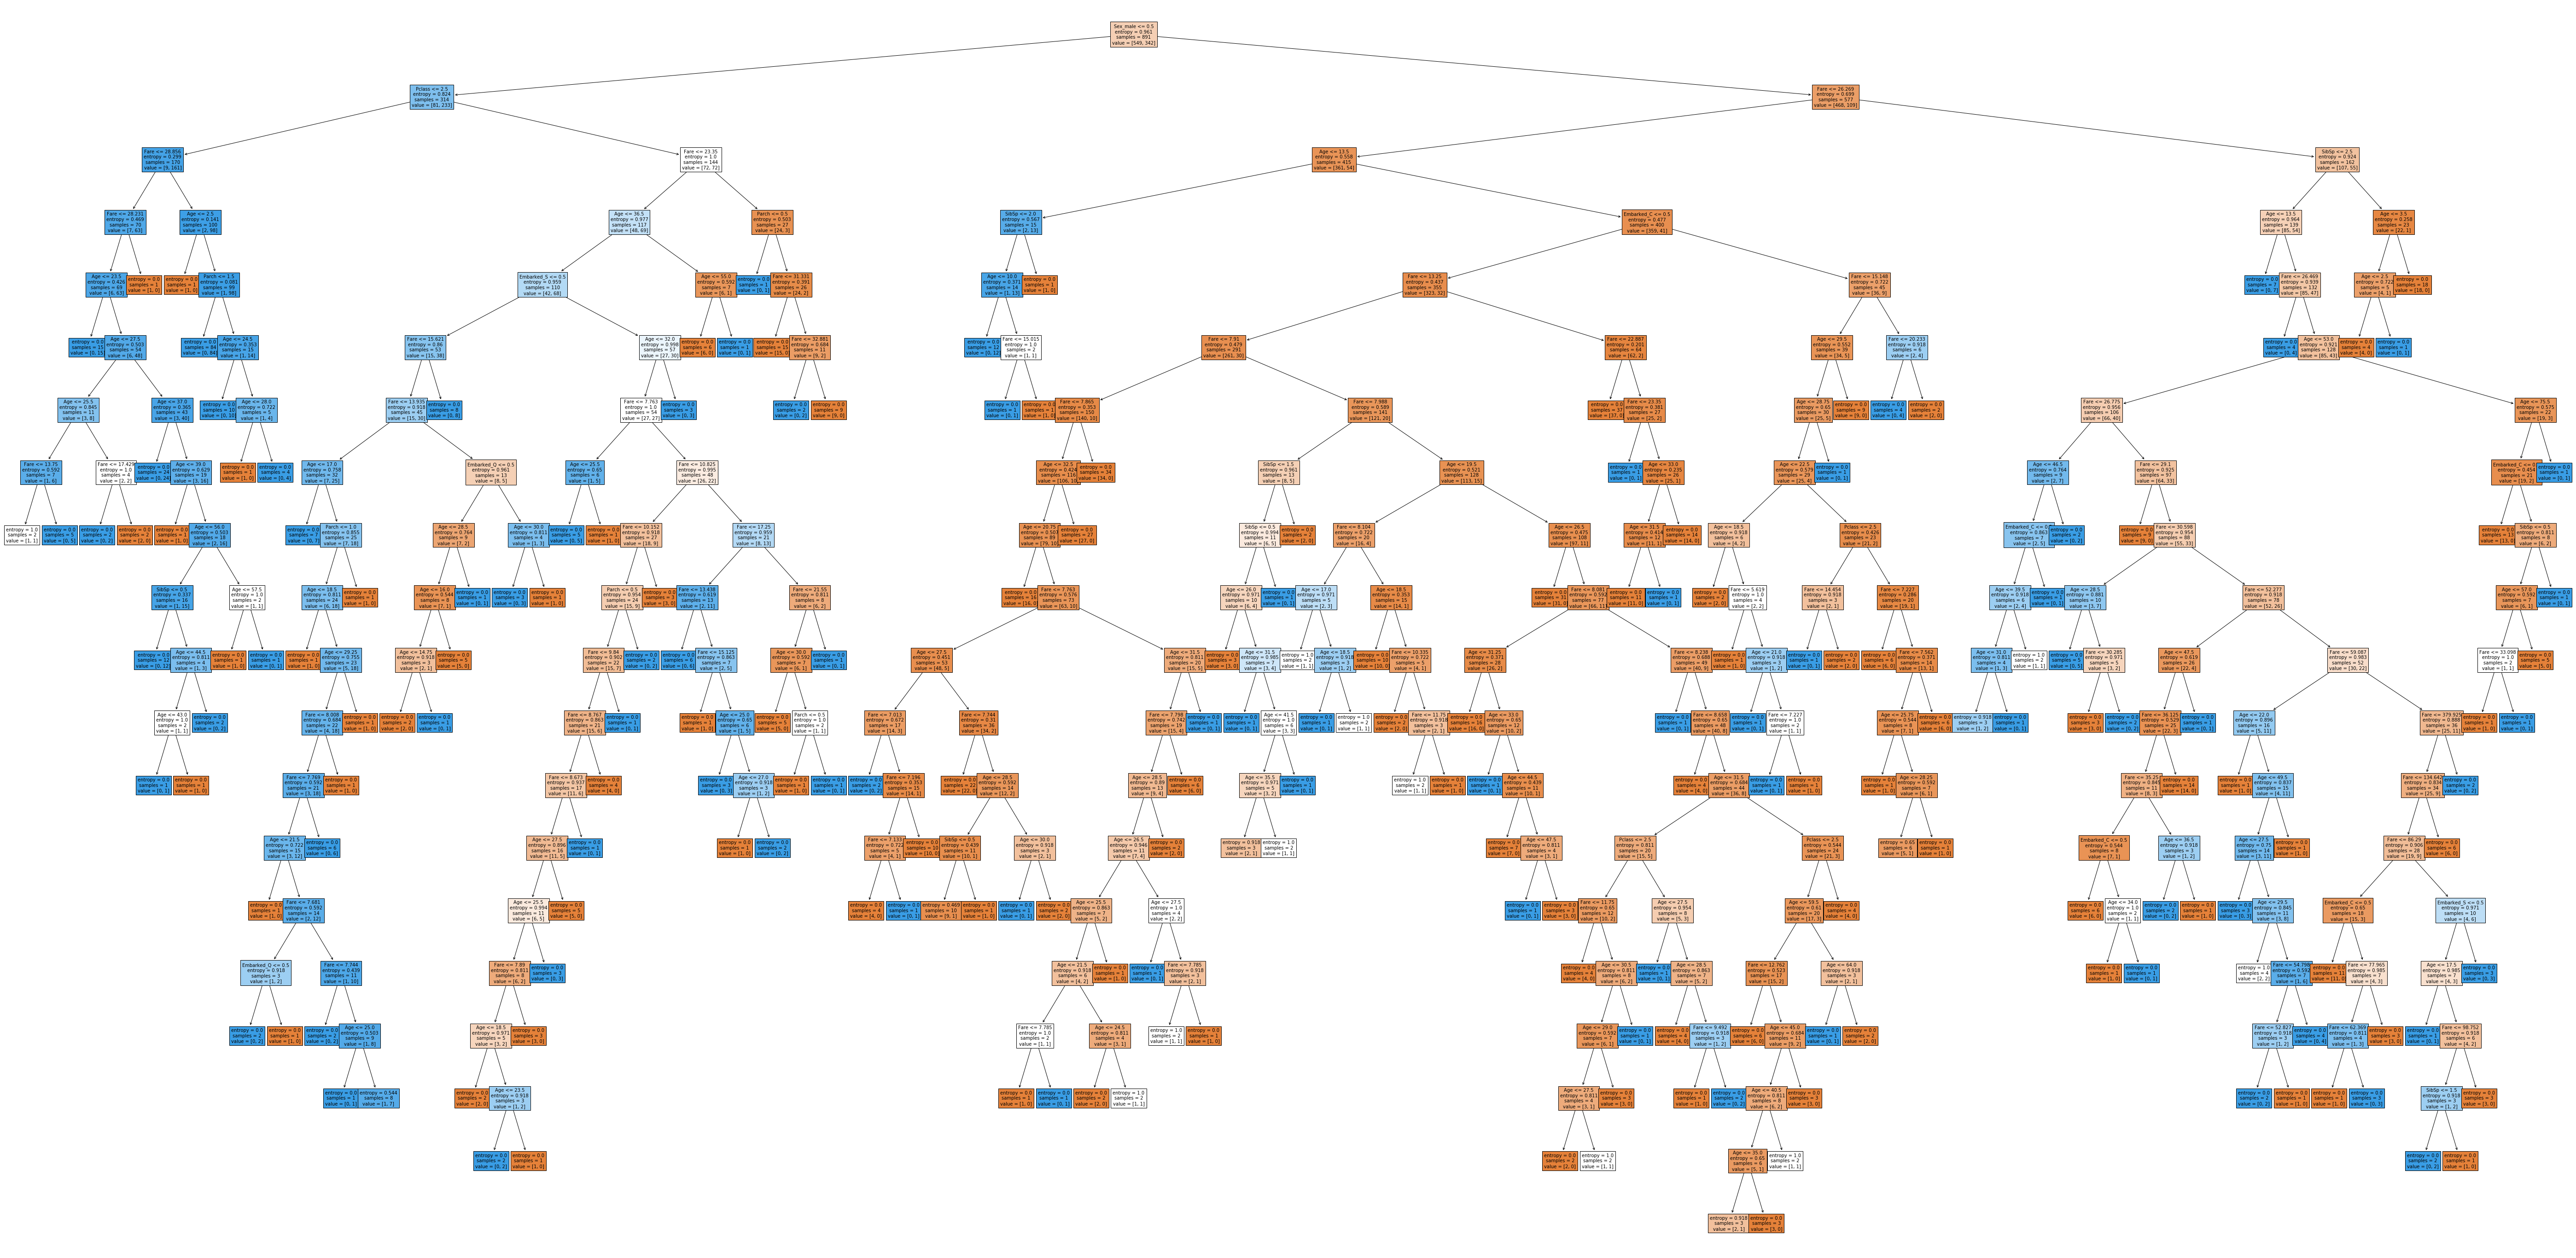

In [18]:
plt.figure(figsize=(100, 50))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

In [21]:
print(X_train.shape)
X_test.shape

(596, 10)


(295, 10)

In [22]:
clf.score(X, y)

0.9797979797979798

In [23]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [24]:
clf.score(X_train, y_train)

0.9798657718120806

In [25]:
clf.score(X_test, y_test)

0.7728813559322034

In [26]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [27]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [28]:
clf.score(X_train, y_train)

0.8406040268456376

In [29]:
clf.score(X_test, y_test)

0.8067796610169492

In [30]:
max_depth_values = range(1, 100)

In [31]:
scores_data = pd.DataFrame()

In [32]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 
                                    'train_score':[train_score],
                                   'test_score':[test_score]})
    scores_data = scores_data.append(temp_score_data)

In [33]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780


In [34]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars = ['train_score','test_score'],
                          var_name = 'set_type', value_name = 'score')

In [35]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


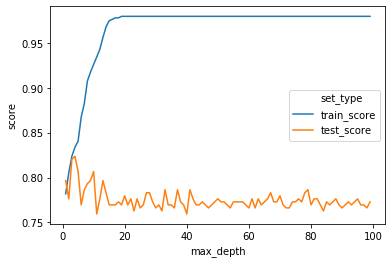

In [36]:
sns.lineplot(x = 'max_depth', y='score', hue = 'set_type', data = scores_data_long)

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [39]:
cross_val_score(clf, X_train, y_train, cv=5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [40]:
cross_val_score(clf, X_train, y_train, cv=5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [41]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 
                                    'train_score':[train_score],
                                   'test_score':[test_score],
                                   'cross_val_score':[mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [42]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,NaN
0,2,0.805369,0.776271,NaN
0,3,0.823826,0.820339,NaN
0,4,0.833893,0.823729,NaN
0,5,0.840604,0.806780,NaN


In [43]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars = ['train_score','test_score',
                                                                             'cross_val_score'],
                          var_name = 'set_type', value_name = 'score')

In [44]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


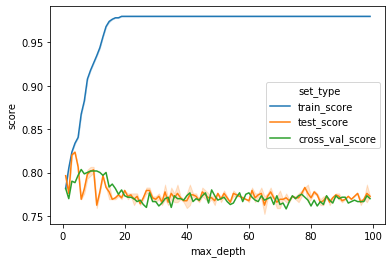

In [45]:
sns.lineplot(x = 'max_depth', y='score', hue = 'set_type', data = scores_data_long)

In [46]:
scores_data_long.query("set_type=='cross_val_score'").head()

,max_depth,set_type,score
396,1,cross_val_score,NaN
397,2,cross_val_score,NaN
398,3,cross_val_score,NaN
399,4,cross_val_score,NaN
400,5,cross_val_score,NaN


In [47]:
best_clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=4)

In [48]:
cross_val_score(best_clf, X_test, y_test, cv=5).mean()

0.7694915254237288

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
clf = tree.DecisionTreeClassifier()

In [51]:
parametrs = {'criterion' : ['gini', 'entropy'], "max_depth": range(1,30)}

In [52]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [53]:
grid_search_cv_clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [54]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [55]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [56]:
best_clf = grid_search_cv_clf.best_estimator_

In [57]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [58]:
best_clf.score(X_test, y_test)

0.7966101694915254

In [59]:
from sklearn.metrics import precision_score, recall_score

In [60]:
y_pred = best_clf.predict(X_test)

In [61]:
precision_score(y_test, y_pred)

0.8191489361702128

In [62]:
recall_score(y_test, y_pred)

0.6416666666666667

In [63]:
y_predicted_proba = best_clf.predict_proba(X_test)

In [64]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

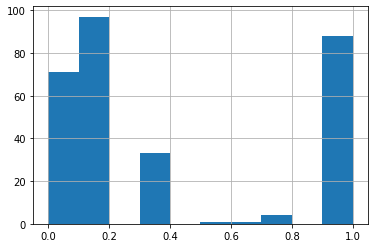

In [65]:
pd.Series(y_predicted_proba[:, 1]).hist()

In [66]:
y_pred = np.where(y_predicted_proba[:, 1] > 0.8, 1, 0)

In [67]:
precision_score(y_test, y_pred)

0.8295454545454546

In [68]:
y_pred = np.where(y_predicted_proba[:, 1] > 0.8, 1, 0)
precision_score(y_test, y_pred)

0.8295454545454546

In [69]:
recall_score(y_test, y_pred)

0.6083333333333333

In [70]:
y_pred = np.where(y_predicted_proba[:, 1] > 0.1, 1, 0)

In [71]:
pd.Series(y_predicted_proba[:, 1]).unique()

array([0.1147541 , 0.38461538, 1.        , 0.        , 0.75      ,
       0.09803922, 0.30434783, 0.32      , 0.16666667, 0.6       ,
       0.66666667])

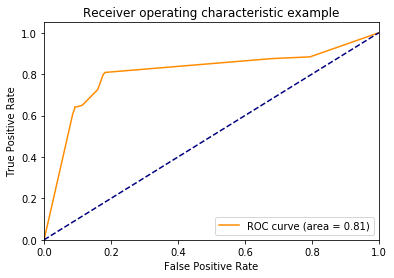

In [72]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_proba[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [73]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3, min_samples_split = 100)

In [74]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100)

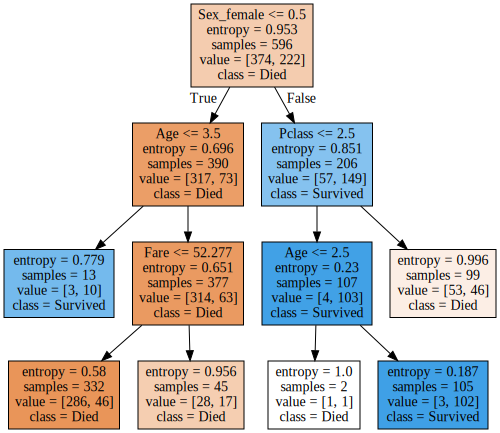

In [75]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                  feature_names=list(X),
                                  class_names=['Died', 'Survived'],
                                  filled=True))
display(SVG(graph.pipe(format='svg')))

In [76]:
###Random forest classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
clf_rf = RandomForestClassifier()

In [79]:
parametrs = {'n_estimators' : [10, 20, 30], 'max_depth' : [2, 5, 7, 10]}

In [80]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv = 5)

In [81]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [82]:
grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 10}

In [83]:
best_clf = grid_search_cv_clf.best_estimator_

In [84]:
best_clf.score(X_test, y_test)

0.7966101694915254

In [85]:
best_clf.feature_importances_

array([0.11766797, 0.13830637, 0.04249872, 0.03606203, 0.19834224,
       0.19846209, 0.20174686, 0.03287243, 0.01161668, 0.02242461])

In [86]:
feature_importances = best_clf.feature_importances_

In [87]:
feature_importances_df = pd.DataFrame({'features' : list(X_train), 
                                       'feature_importances' : feature_importances})

In [88]:
feature_importances_df.sort_values('feature_importances', ascending = False)

,features,feature_importances
6,Sex_male,0.201747
5,Sex_female,0.198462
4,Fare,0.198342
1,Age,0.138306
0,Pclass,0.117668
2,SibSp,0.042499
3,Parch,0.036062
7,Embarked_C,0.032872
9,Embarked_S,0.022425
8,Embarked_Q,0.011617
